In [46]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries
!pip install matplotlib deap
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base,creator,tools,algorithms





In [47]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations =10 # Define the number of locations (eg 10)

locations = [(random.randint(0,100),random.randint(0,100)) for _ in range(num_locations)]# Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot = (50,50)# Define the coordinates for the depot

num_vehicles = 3# Define the number of vehicles - (eg 3)
print(locations)


[(49, 22), (24, 92), (86, 6), (1, 24), (56, 29), (50, 25), (59, 99), (87, 44), (61, 96), (4, 66)]


In [48]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",base.Fitness,weights=(-1.0,-1.0) )
creator.create("Individual",list,fitness=creator.FitnessMin )

In [49]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual",tools.initIterate,creator.Individual,toolbox.indices) #finish defining how to build an individual)
toolbox.register("population", tools.initRepeat,list,toolbox.individual,n=50)#finish defining how to build an population)

In [50]:
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance=0
        for i in range(len(vehicle_route)-1):
            vehicle_distance+=np.sqrt((vehicle_route[i + 1][0] - vehicle_route[i][0])**2 +
                                       (vehicle_route[i + 1][1] - vehicle_route[i][1])**2)
            total_distance += vehicle_distance
            distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)



In [ ]:
#HINTS

#Select is simpler, try tournament selection or roulette selection. Look up how to add that.

#FOR mutation - mutShuffleIndexes

#For mate - cxPartialyMatched, cxOrdered

In [51]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", tools.cxOrdered)# Choose and configure a crossover method)
toolbox.register("mutate",tools.mutShuffleIndexes,indpb=0.05) # Choose and configure a mutation method)
toolbox.register("select",tools.selTournament,tournsize=3) # Choose and configure a selection method)

In [52]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    #TODO: Task 5 - Write a function to visualize the routes - just plot the points and lines for each vehicle
     """Visualizes the routes of vehicles based on the individual's solution.

    Args:
        individual: A list representing the order of locations visited.
        title: The title of the plot.
    """

    # Create a new figure and axes
     fig, ax = plt.subplots()

    # Plot the depot
     ax.scatter(depot[0], depot[1], marker='s', color='black', label='Depot')

    # Plot the locations
     for i, location in enumerate(locations):
        ax.scatter(location[0], location[1], marker='o', color='blue', label=f'Location {i + 1}')

    # Plot the routes for each vehicle with different colors
     colors = ['red', 'green', 'purple', 'orange', 'cyan']  # Add more colors if needed
     for i in range(num_vehicles):
        # Extract the route for the current vehicle
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Plot the route as a line
        route_x = [loc[0] for loc in vehicle_route]
        route_y = [loc[1] for loc in vehicle_route]
        ax.plot(route_x, route_y, color=colors[i % len(colors)], label=f'Vehicle {i + 1}')

    # Set plot title and labels
     ax.set_title(title)
     ax.set_xlabel("X Coordinate")
     ax.set_ylabel("Y Coordinate")

    # Add legend


    # Show the plot
     plt.show()


gen	nevals	avg    	min    
0  	300   	942.165	50.4425
1  	221   	886.202	42.5771
2  	238   	876.714	48.4553
3  	227   	867.215	43.4181
4  	237   	863.825	43.4181
5  	235   	862.085	43.4181
6  	235   	849.113	43.4181
7  	232   	841.952	43.4181
8  	211   	832.267	42.9269
9  	225   	818.372	43.4181
10 	230   	817.537	44.3244
11 	237   	808.083	42.9269
12 	221   	795.174	44.3244
13 	237   	796.206	44.1958
14 	207   	777.993	44.3244
15 	241   	752.103	44.8065
16 	233   	704.212	45.5509
17 	219   	662.579	47.6747
18 	221   	656.514	48.2462
19 	231   	689.206	48.2462
20 	225   	692.927	46.0342
21 	243   	697.362	46.0342
22 	241   	717.534	44.4744
23 	207   	718.084	46.0342
24 	214   	701.019	46.0342
25 	248   	685.839	46.0342
26 	227   	673.179	46.0342
27 	234   	682.916	46.0342
28 	228   	674.942	46.0342
29 	216   	677.007	46.0342
30 	240   	679.406	46.0342


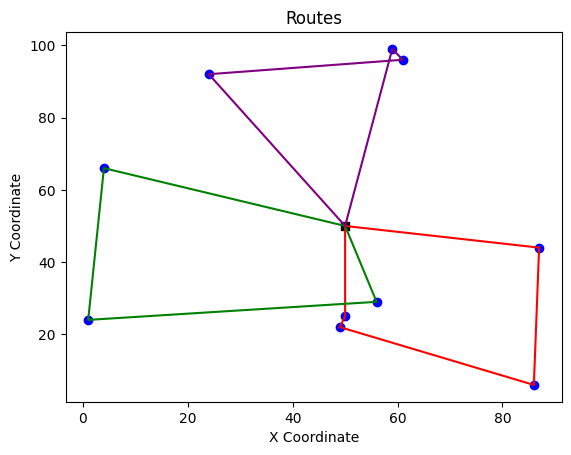

In [53]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    #Refer eaSimple here - https://deap.readthedocs.io/en/master/api/algo.html
    plot_routes(hof[0])

    return pop, stats, hof

if __name__ == "__main__":
    # TODO: Task 9 - Call the main function, run the algorithm and print the results
    main()

